# Introduction

[Titanic challenge](https://www.kaggle.com/c/titanic)
Create a model that predicts if a passenger survived the Titanic shipwreck

## Checking the train data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading the datasets
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
## First of all, let's lowercase the dataframe headers to be better to work with
df.rename(str.lower,axis='columns', inplace=True)
print(df.columns)
df_test.rename(str.lower,axis='columns', inplace=True)
print(df_test.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [6]:
## Ticket and passengerid should be unique keys identifying passengers, let's check
print(f"Train dataframe shape: {df.shape}")
print(f"# of unique passengerid {len(df.passengerid.unique())}")
print(f"# of unique ticket {len(df.ticket.unique())}")
print(f"# of unique cabins {len(df.cabin.unique())}")

Train dataframe shape: (891, 12)
# of unique passengerid 891
# of unique ticket 681
# of unique cabins 148


In [7]:
print(f"Test dataframe shape: {df_test.shape}")
print(f"# of unique passengerid {len(df_test.passengerid.unique())}")
print(f"# of unique ticket {len(df_test.ticket.unique())}")
print(f"# of unique cabins {len(df_test.cabin.unique())}")

Test dataframe shape: (418, 11)
# of unique passengerid 418
# of unique ticket 363
# of unique cabins 77


In [8]:
## Ok, we could see some passengers are sharing the same ticket, are passengers repeated or 
## are there different passengers sharing the same ticket?
num_pass_per_ticket = df.groupby('ticket')['passengerid'].nunique()
tickets_to_observe = num_pass_per_ticket[num_pass_per_ticket > 1].index
tickets_to_observe

Index(['110152', '110413', '110465', '111361', '113505', '113572', '113760',
       '113776', '113781', '113789',
       ...
       'PC 17761', 'PP 9549', 'S.C./PARIS 2079', 'S.O./P.P. 3', 'S.O.C. 14879',
       'SC/Paris 2123', 'STON/O2. 3101279', 'W./C. 6607', 'W./C. 6608',
       'WE/P 5735'],
      dtype='object', name='ticket', length=134)

In [9]:
## Here we should observe the repeated labels - sorting beacause train dataset should have 220 lines in total
df[df.ticket.map(lambda ticket: ticket in tickets_to_observe)].sort_values(by=['ticket'])

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S
...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S


In [10]:
# It seems that all repeated passengers should be indeed distinct passengers

## Checking categorical variables

In [11]:
## Let's check value counts for categorical variables
categorical_features = ['survived','pclass','sex','embarked','cabin'] 
for item in categorical_features:
    print(f"\n\n{item}, # of unique values: {df[item].nunique(dropna=False)}\n")
    print(df[item].value_counts(dropna=False))



survived, # of unique values: 2

0    549
1    342
Name: survived, dtype: int64


pclass, # of unique values: 3

3    491
1    216
2    184
Name: pclass, dtype: int64


sex, # of unique values: 2

male      577
female    314
Name: sex, dtype: int64


embarked, # of unique values: 4

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64


cabin, # of unique values: 148

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: cabin, Length: 148, dtype: int64


In [12]:
## Let's also check the test datase
categorical_features_test = ['pclass','sex','embarked','cabin'] 
for item in categorical_features_test:
    print(f"\n\n{item}, # of unique values: {df_test[item].nunique(dropna=False)}\n")
    print(df_test[item].value_counts(dropna=False))



pclass, # of unique values: 3

3    218
1    107
2     93
Name: pclass, dtype: int64


sex, # of unique values: 2

male      266
female    152
Name: sex, dtype: int64


embarked, # of unique values: 3

S    270
C    102
Q     46
Name: embarked, dtype: int64


cabin, # of unique values: 77

NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: cabin, Length: 77, dtype: int64


In [13]:
## It seems embarked has 2 null values that can be easily replaced by the mode (S), but most of cabin values are null...
## Twt dataset seems fine
df.embarked = df.embarked.fillna(df.embarked.mode().values[0])
df.embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
# Not sure what to do, so I will ignore this feature for a while
df.cabin.head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: cabin, dtype: object

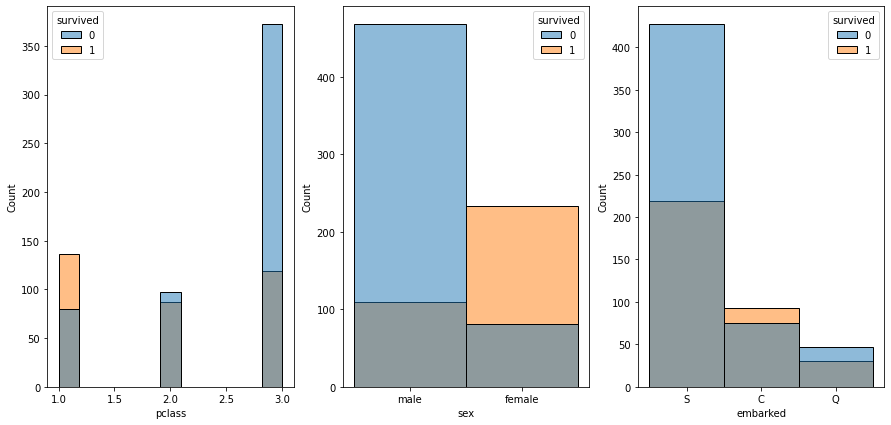

In [15]:
## We can see that being rich (measured as 1st pclass) and being a woman are good predictors of survival
fig, axs = plt.subplots(1,3, figsize=(15,7))
sns.histplot(data=df, x='pclass', kde=False, ax=axs[0], hue='survived')
sns.histplot(data=df, x='sex', kde=False, ax=axs[1], hue='survived')
sns.histplot(data=df, x='embarked', kde=False, ax=axs[2], hue='survived')
plt.show()

In [16]:
## Let's see if there are correlations between being rich and embarking in "C" and being rich and being a woman
pd.pivot_table(df[['survived','pclass','sex']],values='survived',index=['pclass'],columns=['sex'],aggfunc='count')

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


In [17]:
pd.pivot_table(df[['survived','pclass','embarked']],values='survived',index=['pclass'],columns=['embarked'],aggfunc='count')

embarked,C,Q,S
pclass,,,
1,85,2,129
2,17,3,164
3,66,72,353


In [18]:
## Indeed, more rich people embarked in C. Which can probably tell us this is a better predictor

## Numerical values

In [19]:
numerical_features = ['age','sibsp','parch','fare']

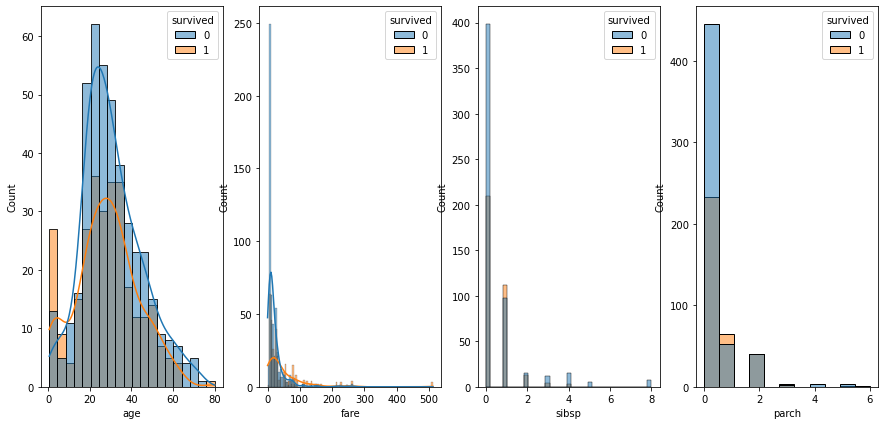

In [20]:
fig, axs = plt.subplots(1,4, figsize=(15,7))
sns.histplot(data=df, x='age', kde=True, ax=axs[0], hue='survived')
sns.histplot(data=df, x='fare', kde=True, ax=axs[1], hue='survived')
sns.histplot(data=df, x='sibsp', kde=False, ax=axs[2], hue='survived')
sns.histplot(data=df, x='parch', kde=False, ax=axs[3], hue='survived')

plt.show()

In [21]:
## As we can see qualitatively, fare, # of siblings or # of parents in the boat doesn't
## seem to have a correlation with survival rate, but being a baby is

In [22]:
df[numerical_features].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [23]:
df_test[numerical_features].describe()

,age,sibsp,parch,fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


In [24]:
## There are probably NaN values on age in both datasets
## There is a Nan value on fare of test dataset
print(f"# of nulls in age feature of train dataset: {df['age'].isna().sum()}")
print(f"# of nulls in age feature of test dataset: {df_test['age'].isna().sum()}")
print(f"# of nulls in fare feature of test dataset: {df_test['fare'].isna().sum()}")

# of nulls in age feature of train dataset: 177
# of nulls in age feature of test dataset: 86
# of nulls in fare feature of test dataset: 1


In [25]:
## Let's substitue age nulls with mean values
df['age'].fillna(df.age.mean(), inplace=True)
df_test['age'].fillna(df_test.age.mean(), inplace=True)
df_test['fare'].fillna(df_test.fare.mean(), inplace=True)
print(f"# of train set nulls in age: {df['age'].isna().sum()}")
print(f"# of test set nulls in age: {df_test['age'].isna().sum()}")
print(f"# of test set nulls in fare: {df_test['fare'].isna().sum()}")

# of train set nulls in age: 0
# of test set nulls in age: 0
# of test set nulls in fare: 0


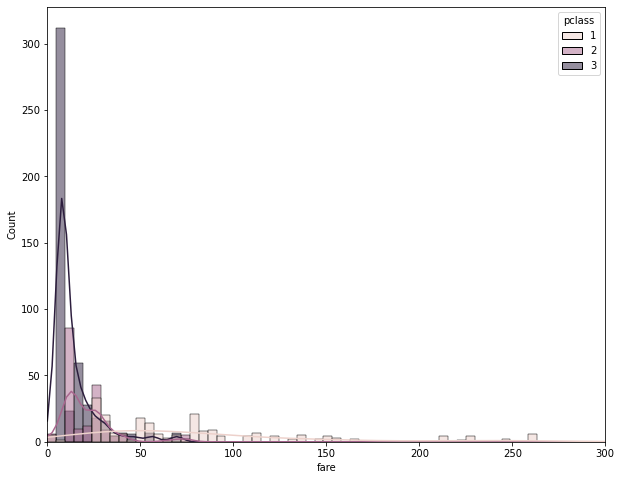

In [26]:
# Higher Fare is probably related with Higher pclass, let's check
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=df, x='fare',kde=True, hue='pclass', ax=ax)
ax.set_xlim(0,300)
plt.show()

In [27]:
# It's quite distributed for 1st class

## Checking which features are the most important ones
To do that, we will fit a random forest standard model and plot a variable importance test

In [28]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['sex_encoded'] = le_sex.fit_transform(df['sex'])
df['embarked_encoded'] = le_embarked.fit_transform(df['embarked'])
df_test['sex_encoded'] = le_sex.transform(df_test['sex'])
df_test['embarked_encoded'] = le_embarked.transform(df_test['embarked'])

In [29]:
from sklearn.ensemble import RandomForestClassifier

mdl = RandomForestClassifier(n_estimators=100)
X_eda_model = df[['pclass','sex_encoded','embarked_encoded','age','fare','sibsp','parch']]
y_eda_model = df['survived']

mdl.fit(X_eda_model,y_eda_model)

RandomForestClassifier()

In [30]:
df_feature_importance = pd.DataFrame(data={"names": X_eda_model.columns, "importances": mdl.feature_importances_})
df_feature_importance.sort_values(by=['importances'], ascending=False, inplace=True)

<AxesSubplot:xlabel='names', ylabel='importances'>

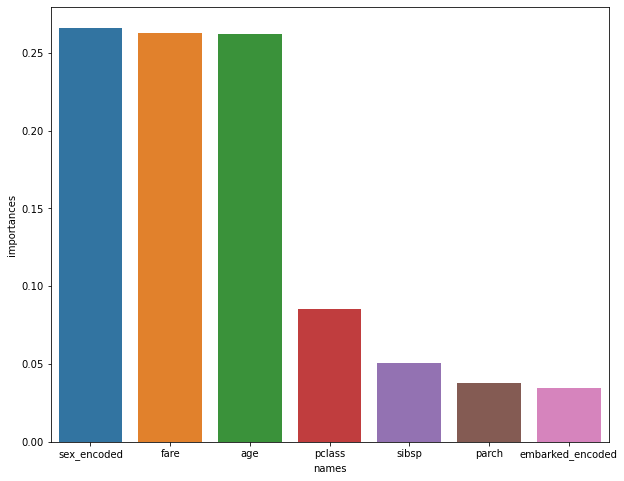

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_feature_importance.names, y=df_feature_importance.importances)

### Conclusions from first random forest model
- `fare`,`age`,`sex` and `pclass` are the key features that predict whether a passenger will survive or not
- With that knowledge we can build some models

## Let's try some regression models
- First, I will create aone hot enconding for non ordinal categorical variables: `sex`,`embarked`
- Then I will transform skewed numerical variables
- Then we can fit a logistic regression model

In [32]:
one_hot = pd.get_dummies(df[['sex','embarked']])
one_hot_test = pd.get_dummies(df_test[['sex','embarked']])

In [33]:
df[['sex_female','sex_male','embarked_C','embarked_Q','embarked_S']] = one_hot[['sex_female','sex_male','embarked_C','embarked_Q','embarked_S']]
df_test[['sex_female','sex_male','embarked_C','embarked_Q','embarked_S']] = one_hot_test[['sex_female','sex_male','embarked_C','embarked_Q','embarked_S']]

In [34]:
df[['age_log','fare_log','sibsp_log','parch_log']] = df[['age','fare','sibsp','parch']].apply(lambda x: np.log(x + 1))
df_test[['age_log','fare_log','sibsp_log','parch_log']] = df_test[['age','fare','sibsp','parch']].apply(lambda x: np.log(x + 1))

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age_log_scaled','fare_log_scaled','sibsp_log_scaled','parch_log_scaled']] = scaler.fit_transform(
    df[['age_log','fare_log','sibsp_log','parch_log']])

df_test[['age_log_scaled','fare_log_scaled','sibsp_log_scaled','parch_log_scaled']] = scaler.transform(
    df_test[['age_log','fare_log','sibsp_log','parch_log']])

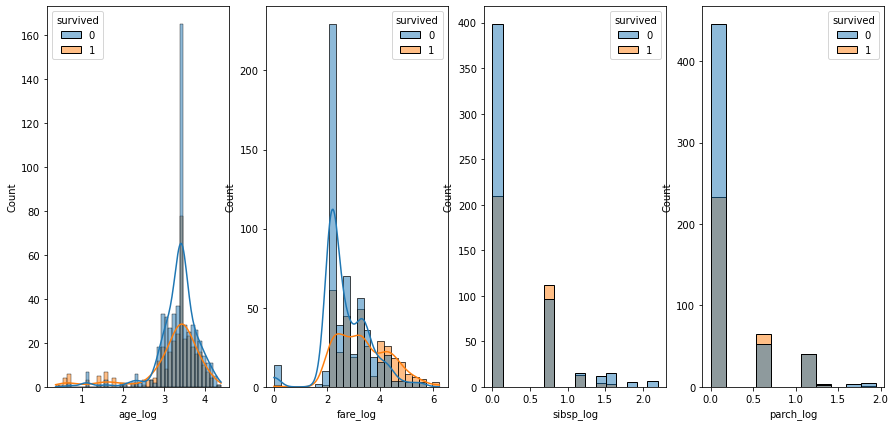

In [36]:
fig, axs = plt.subplots(1,4, figsize=(15,7))
sns.histplot(data=df, x='age_log', kde=True, ax=axs[0], hue='survived')
sns.histplot(data=df, x='fare_log', kde=True, ax=axs[1], hue='survived')
sns.histplot(data=df, x='sibsp_log', kde=False, ax=axs[2], hue='survived')
sns.histplot(data=df, x='parch_log', kde=False, ax=axs[3], hue='survived')

plt.show()

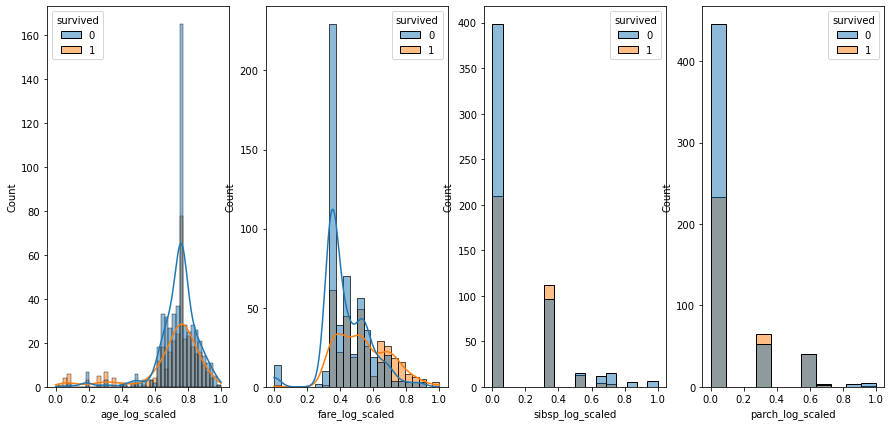

In [37]:
fig, axs = plt.subplots(1,4, figsize=(15,7))
sns.histplot(data=df, x='age_log_scaled', kde=True, ax=axs[0], hue='survived')
sns.histplot(data=df, x='fare_log_scaled', kde=True, ax=axs[1], hue='survived')
sns.histplot(data=df, x='sibsp_log_scaled', kde=False, ax=axs[2], hue='survived')
sns.histplot(data=df, x='parch_log_scaled', kde=False, ax=axs[3], hue='survived')

plt.show()

In [38]:
print(df.shape)
df.head()

(891, 27)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,embarked_Q,embarked_S,age_log,fare_log,sibsp_log,parch_log,age_log_scaled,fare_log_scaled,sibsp_log_scaled,parch_log_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,3.135494,2.110213,0.693147,0.0,0.688670,0.338125,0.315465,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,3.663562,4.280593,0.693147,0.0,0.819257,0.685892,0.315465,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,3.295837,2.188856,0.000000,0.0,0.728321,0.350727,0.000000,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,3.583519,3.990834,0.693147,0.0,0.799463,0.639463,0.315465,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,3.583519,2.202765,0.000000,0.0,0.799463,0.352955,0.000000,0.0


In [39]:
y = df['survived']
X = df[['pclass','sex_female','sex_male','embarked_C','embarked_Q','embarked_S',
        'age_log_scaled','fare_log_scaled','sibsp_log_scaled','parch_log_scaled']]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
print(f"train split: {X_train.shape}")
print(f"test split: {X_test.shape}")

train split: (668, 10)
test split: (223, 10)


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
select_important_features = lambda df: df[['sex_female','sex_male','pclass','age_log_scaled','fare_log_scaled']]

In [44]:
simple_log_reg_model = LogisticRegression()
simple_log_reg_model.fit(select_important_features(X_train),y_train)

LogisticRegression()

In [45]:
y_pred = simple_log_reg_model.predict(select_important_features(X_test))

In [46]:
from sklearn import metrics

In [47]:
print(metrics.classification_report(y_test, y_pred, target_names=['Not survived','Survived']))

              precision    recall  f1-score   support

Not survived       0.80      0.83      0.81       133
    Survived       0.73      0.69      0.71        90

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



In [48]:
## 82% accuracy and a relatively high precision
## Let's try a log reg model with all

In [49]:
full_log_reg_model = LogisticRegression()
full_log_reg_model.fit(X_train,y_train)
y_pred_full = full_log_reg_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred_full, target_names=['Not survived','Survived']))

              precision    recall  f1-score   support

Not survived       0.80      0.88      0.84       133
    Survived       0.79      0.68      0.73        90

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [50]:
##  Interesting, less accuracy than we had....
## Let's try a random forest model, to do that we will use only relevant features and non scaled or encoded variables

In [51]:
X_rf = df[['pclass','sex_encoded','embarked_encoded','age','fare']]
y_rf = df['survived']

In [52]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf)

In [53]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_rf_train, y_rf_train)
y_pred_rf = model_rf.predict(X_rf_test)
print(metrics.classification_report(y_rf_test, y_pred_rf, target_names=['Not survived','Survived']))

              precision    recall  f1-score   support

Not survived       0.85      0.93      0.89       137
    Survived       0.86      0.74      0.80        86

    accuracy                           0.86       223
   macro avg       0.86      0.84      0.84       223
weighted avg       0.86      0.86      0.85       223



## Choosing the best ML algorithm and predicting with test data
Random forest classifier was the algo with best results in terms of accuracy, precision and recall, so let's pick it

In [54]:
X_test_file = df_test[['pclass','sex_encoded','embarked_encoded','age','fare']]
y_pred_test_file = model_rf.predict(X_test_file)
df_predicted = pd.DataFrame({"PassengerId": df_test['passengerid'], "Survived": y_pred_test_file})
print(f"Predictions:\n{df_predicted.Survived.value_counts()}")

Predictions:
0    270
1    148
Name: Survived, dtype: int64


In [56]:
df_predicted.to_csv("./output/predictions.csv", index=False)